In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pickle
with open('/content/drive/MyDrive/2020_WINTER/Rust/data_final/table3_rust_simulation.txt','rb') as fp:
  res = pickle.load(fp)
print(res)

{'theta3': {'trans_count': array([ 37883, 178468,  76292,   4357]), 'x': array([0.12755218, 0.60090235, 0.25687542, 0.01467004]), '95_conf_interv': array([[0.12857107, 0.60264625, 0.25835051, 0.0152919 ],
       [0.12660423, 0.59913932, 0.25538456, 0.01412788]]), 'std_errors': array([0.00051819, 0.00087455, 0.00075971, 0.00029774]), 'fun': 290995.99706719577}, 'theta1': {'x': array([9.81059937, 1.05944176]), 'fun': 10754.44608222925, 'message': 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH', 'jac': array([0.00109139, 0.01236913]), '95_conf_interv': array([[10.39657874,  1.1728511 ],
       [ 9.27874925,  0.95603192]]), 'std_errors': array([0.28855529, 0.05667824])}}


In [5]:
import numpy as np
np.around(np.array([0.12755218, 0.60090235, 0.25687542, 0.01467004]),4)

array([0.1276, 0.6009, 0.2569, 0.0147])

In [6]:
import numpy as np
def AIC(loglike,k,n):
  return -2*loglike + 2*k #+ 2*k*(k+1)/(n-k-1)

def BIC(loglike,k,n):
  return -2*loglike + k*np.log(n) 


model1 = [-262973,11,3000*100]

model2 = [-301750,5,3000*100]

#true_value = [-252338.53280359664 -10667.42123411531,11,3000*100]
print('AIC',AIC(model1[0],model1[1],model1[2]),AIC(model2[0],model2[1],model2[2]))#,AIC(true_value[0],true_value[1],true_value[2]))
print('BIC',BIC(model1[0],model1[1],model1[2]),BIC(model2[0],model2[1],model2[2]))#,AIC(true_value[0],true_value[1],true_value[2]))

AIC 525968 603510
BIC 526084.72691529 603563.0576887681


In [7]:
import numpy as np
def AIC(loglike,k,n):
  return -2*loglike + 2*k #+ 2*k*(k+1)/(n-k-1)

def BIC(loglike,k,n):
  return -2*loglike + k*np.log(n) 


model1 = [-3819.070,11,37*117]            #[-262973,11,3000*100]

model2 = [-4495,5,37*117]                #[-301750,5,3000*100]

#true_value = [-252338.53280359664 -10667.42123411531,11,3000*100]
print('AIC',AIC(model1[0],model1[1],model1[2]),AIC(model2[0],model2[1],model2[2]))#,AIC(true_value[0],true_value[1],true_value[2]))
print('BIC',BIC(model1[0],model1[1],model1[2]),BIC(model2[0],model2[1],model2[2]))#,AIC(true_value[0],true_value[1],true_value[2]))

AIC 7660.14 9000
BIC 7730.244010321862 9031.86545923721


In [8]:
print(7513/10.075*0.001*2.29,    7513/10.0896 * 1.1732 * 0.001/90 *175)
print(9499/11.727*4.8259*0.001,   9499/11.7257 *2.4569*0.001/90 *175)
#print(9499/11.7257,810.10 * 0.0024569,1.99/2571,0.0007*5000)
print(7513/9.738*0.3*0.001,7513/9.738*1.3*0.001)

1.7076694789081888 1.6986622418684143
3.909032497654984 3.8700994799647117
0.23145409735058534 1.0029677551858698


In [10]:
# import numpy as np

# def DataGenerate(time):
#   # Assume z0==0
#   N = 5**time
#   action = np.ones([time,N],dtype = int)
#   delta_z = np.zeros([time+1,N],dtype = int)
#   state = np.zeros([time+1,N],dtype = int)
#   action[0,0:int(N*4/5)] = 0

#   for i in range(1,time+1):
#     seq_z = int(N/ (5**i))
#     seq_a = int(seq_z * 4/5)
#     delta_z[i,np.reshape(np.arange(0,N).reshape([int(N/seq_z/5),int(seq_z*5)])[:,seq_z:2*seq_z],[-1,1])] = 1
#     delta_z[i,np.reshape(np.arange(0,N).reshape([int(N/seq_z/5),int(seq_z*5)])[:,2*seq_z:3*seq_z],[-1,1])] = 2
#     delta_z[i,np.reshape(np.arange(0,N).reshape([int(N/seq_z/5),int(seq_z*5)])[:,3*seq_z:4*seq_z],[-1,1])] = 3
#     #delta_z[i,np.reshape(np.arange(0,N).reshape([int(N/seq_z/5),int(seq_z*5)])[:,4*seq_z:5*seq_z],[-1,1])] = -1

#     if i!= time:
#         action[i,np.reshape(np.arange(0,N).reshape([int(N/seq_z),seq_z])[:,0:seq_a],[-1,1])]=0
#     state[i,np.where(action[i-1]==0)] = delta_z[i,np.where(action[i-1]==0)] + state[i-1,np.where(action[i-1]==0)]
#   return action,state,delta_z

# def Dynamic(params):
#     # theta2 = np.around(params[6:8],3)
#     # p0 = np.around(params[0:3],3)
#     # p1 = np.around(params[3:6],3)
#     theta2 = params[6:8]
#     p0 = params[0:3]
#     p1 = params[3:6]
    
#     # ztranc: [2,175*2,175*2] [s , z * action, z' *s']
#     # stranc: [2,175*2,175*2] [s , z * action, z'*s']

#     ztranc = np.zeros([2,175*2,175*2])
#     stranc = np.zeros([2,175*2,175*2])

#     ztranc[0,0:175,:] = np.kron(np.ones(2),p0[0]*np.eye(175,k=0) + p0[1] *np.eye(175,k=1) + p0[2]*np.eye(175,k=2) + (1-np.sum(p0)) *np.eye(175,k=3))
#     ztranc[1,0:175,:] = np.kron(np.ones(2),p1[0]*np.eye(175,k=0) + p1[1] *np.eye(175,k=1) + p1[2]*np.eye(175,k=2) + (1-np.sum(p1)) *np.eye(175,k=3))
#     ztranc[:,175:2*175,0] = np.ones([2,175])

#     stranc[0,0:175,:] = np.hstack([theta2[0] *np.ones([175,175]),(1-theta2[0]) *np.ones([175,175])])
#     stranc[1,0:175,:] = np.hstack([theta2[1] *np.ones([175,175]),(1-theta2[1]) *np.ones([175,175])])
#     stranc[:,175:2*175,0] = np.ones([2,175])
#     #print(np.around(stranc*ztranc,3))
#     return stranc*ztranc#
#     #return np.around(stranc*ztranc,5)

# def SigmaBelief(params,x0,action,state,time):
#     dynamic = Dynamic(params)

#     x_tol = np.zeros(state.shape)
#     x_tol[0,:] = x0
#     sigma_tol = np.zeros(action.shape)
#     for i in range(time):
#       z = state[i]
#       z_prime = state[i+1]

#       a = action[i]

#       x_temp = x_tol[i,:]  * dynamic[0,z+ a*175, z_prime +0] + (1-x_tol[i,:] ) * dynamic[1,z+ a*175, z_prime +0] 
#       sigma_tol[i] = x_temp + x_tol[i,:]  * dynamic[0,z+ a*175, z_prime +175] + (1-x_tol[i,:] ) * dynamic[1,z+ a*175, z_prime +175]

#       x_tol[i+1,:]  = x_temp/sigma_tol[i]
    
#     return sigma_tol,x_tol



# from scipy.optimize import minimize #scipy version = 1.4.1
# from tqdm import tqdm
# #time = 6
# theta2 = [0.949,0.012]
# p0 = [0.039,0.333,0.590]
# p1=[0.181,0.757,0.061]
# params_true = p0 + p1 +theta2


# theta0 = [0.1,0.1,0.1,0.1,0.1,0.1, 0.1, 0.1]
# cons= ({'type': 'ineq', 'fun': lambda x: x[0]-0.001 },\
#         {'type': 'ineq', 'fun': lambda x: x[1]-0.001 },\
#         {'type': 'ineq', 'fun': lambda x: x[2]-0.001 },\
#         {'type': 'ineq', 'fun': lambda x: x[3]-0.001 },\
#         {'type': 'ineq', 'fun': lambda x: x[4]-0.001},\
#         {'type': 'ineq', 'fun': lambda x: x[5]-0.001 },\
#         {'type': 'ineq', 'fun': lambda x: x[6]},\
#         {'type': 'ineq', 'fun': lambda x: x[7]},\
#         {'type': 'ineq', 'fun': lambda x: 0.998-x[0]},\
#         {'type': 'ineq', 'fun': lambda x: 0.998-x[1]},\
#         {'type': 'ineq', 'fun': lambda x: 0.998-x[2]},\
#         {'type': 'ineq', 'fun': lambda x: 0.998-x[3]},\
#         {'type': 'ineq', 'fun': lambda x: 0.998-x[4]},\
#         {'type': 'ineq', 'fun': lambda x: 0.998-x[5]},\
#         {'type': 'ineq', 'fun': lambda x: 0.99999-x[6]},\
#         {'type': 'ineq', 'fun': lambda x: 0.99999-x[7]},\
#         {'type': 'ineq', 'fun': lambda x: 1-x[0]-x[1]-x[2]-0.001 },\
#         {'type': 'ineq', 'fun': lambda x: 1-x[3]-x[4]-x[5]-0.001 },\
#         {'type': 'ineq', 'fun': lambda x: -3*x[0]-2*x[1]-x[2]+3*x[3]+2*x[4]+x[5] })

# x0_dim = 20
# time = 2
# theta_estimate = np.zeros([time_dim,x0_dim,8])
# theta_fun = np.zeros([time_dim,x0_dim])
# theta_success = np.zeros([time_dim,x0_dim])
# recover = []


# action,state,_ = DataGenerate(time)
# #x0_true = np.ones(action.shape[1])

# x0_true = np.random.uniform(size =[x0_dim, action.shape[1]])
# #print(action.shape)
# #print(state.shape)

# def funcSum(theta, x0_true,params_true,action,state,time):
#   func = 0
#   for xx in range(x0_true.shape[0]):
#     sigma_true,_ = SigmaBelief(params_true,x0_true[xx,:],action,state,time)
#     func = func + (np.linalg.norm(SigmaBelief(theta,x0_true[xx,:],action,state,time)[0] -sigma_true))**2
#   #print(theta,func)
#   return func

# func = lambda theta: funcSum(theta, x0_true,params_true,action,state,time)

# fitted2 = minimize(
#     func,
#     x0=theta0,#bounds = bounds,
#     constraints= cons)#,
#     #options={'disp': True})
# print(fitted2)

# # # res = {'estimator':fitted2.x,'true': params_true}
# # # import pickle
# # # with open('/content/drive/MyDrive/2020_WINTER/Rust/identity_time2_x20.txt',"wb") as fp:
# # #   pickle.dump(res,fp)
# print(params_true)

# #########################calculate true value of rust#############################
# # theta20 = params_true[6]
# # theta21 = 1 - params_true[7]
# # params_true = np.array(params_true)
# # theta2_new = [(1-theta21)/(2-theta20-theta21),(1-theta20)/(2-theta20-theta21)]
# # theta3_new = params_true[0:3]*theta2_new[0] + params_true[3:6] * theta2_new[1]
# # r = 0.0002*theta2_new[0] + 0.0012 *theta2_new[1]
# # print(theta3_new, 1-np.sum(theta3_new),r)

In [12]:
# from scipy.optimize import minimize #scipy version = 1.4.1
# from tqdm import tqdm
# #time = 6
# theta2 = [0.949,0.012]
# p0 = [0.039,0.333,0.590]
# p1=[0.181,0.757,0.061]
# params_true = p0 + p1 +theta2


# theta0 = [0.1,0.1,0.1,0.1,0.1,0.1, 0.1, 0.1]
# cons= ({'type': 'ineq', 'fun': lambda x: x[0]-0.001 },\
#         {'type': 'ineq', 'fun': lambda x: x[1]-0.001 },\
#         {'type': 'ineq', 'fun': lambda x: x[2]-0.001 },\
#         {'type': 'ineq', 'fun': lambda x: x[3]-0.001 },\
#         {'type': 'ineq', 'fun': lambda x: x[4]-0.001},\
#         {'type': 'ineq', 'fun': lambda x: x[5]-0.001 },\
#         {'type': 'ineq', 'fun': lambda x: x[6]},\
#         {'type': 'ineq', 'fun': lambda x: x[7]},\
#         {'type': 'ineq', 'fun': lambda x: 0.998-x[0]},\
#         {'type': 'ineq', 'fun': lambda x: 0.998-x[1]},\
#         {'type': 'ineq', 'fun': lambda x: 0.998-x[2]},\
#         {'type': 'ineq', 'fun': lambda x: 0.998-x[3]},\
#         {'type': 'ineq', 'fun': lambda x: 0.998-x[4]},\
#         {'type': 'ineq', 'fun': lambda x: 0.998-x[5]},\
#         {'type': 'ineq', 'fun': lambda x: 0.99999-x[6]},\
#         {'type': 'ineq', 'fun': lambda x: 0.99999-x[7]},\
#         {'type': 'ineq', 'fun': lambda x: 1-x[0]-x[1]-x[2]-0.001 },\
#         {'type': 'ineq', 'fun': lambda x: 1-x[3]-x[4]-x[5]-0.001 },\
#         {'type': 'ineq', 'fun': lambda x: -3*x[0]-2*x[1]-x[2]+3*x[3]+2*x[4]+x[5] })

# x0_dim = 100
# time_dim = 8
# theta_estimate = np.zeros([time_dim,x0_dim,8])
# theta_fun = np.zeros([time_dim,x0_dim])
# theta_success = np.zeros([time_dim,x0_dim])
# recover = []
# for time in range(1,time_dim+1):
#     action,state,_ = DataGenerate(time)
#     #x0_true = np.ones(action.shape[1])
#     x0_true = np.random.uniform(size = action.shape[1])
#     #print(action.shape)
#     #print(state.shape)
#     sigma_true,_ = SigmaBelief(params_true,x0_true,action,state,time)
#     #print(sigma_tol)

#     func = lambda theta: np.linalg.norm(SigmaBelief(theta,x0_true,action,state,time)[0] -sigma_true)
#     fitted2 = minimize(
#         func,
#         x0=theta0,#bounds = bounds,
#         constraints= cons)#,
#         #options={'disp': True})
#     recover.append(fitted2)

#     for i in tqdm(range(x0_dim)):
#         x0_dk = np.random.uniform(size = action.shape[1])
#         #x0_dk = i/(x0_dim-1)*np.ones(action.shape[1])
#         func = lambda theta: np.linalg.norm(SigmaBelief(theta,x0_dk,action,state,time)[0] -sigma_true)

#         fitted2 = minimize(
#             func,
#             x0=theta0,#bounds = bounds,
#             constraints= cons)#,
#             #options={'disp': True})
#         theta_estimate[time-1,i,:] = fitted2.x
#         theta_fun[time-1,i] = fitted2.fun
#         theta_success[time-1,i] = fitted2.success 

In [13]:
# # theta_estimate = theta_estimate[0:8,:,:]
# # theta_fun = theta_fun[0:8,:]
# # theta_success = theta_success[0:8,:]
# # time_dim = 8
# # #len(recover)
# print(np.max(theta_estimate,axis=1)-np.min(theta_estimate,axis=1))
# # # print(theta_estimate[:,:,6])

# for i in range(len(recover)):
#   print(recover[i].x)
# print(params_true)

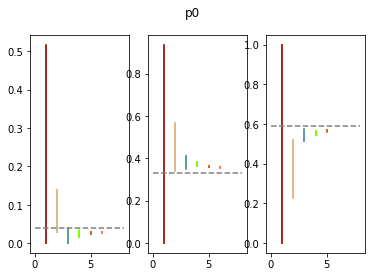

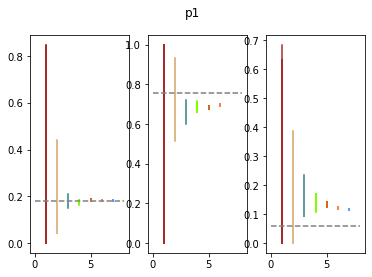

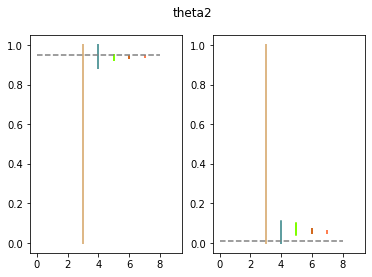

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import numpy as np
import pickle

with open('/content/drive/MyDrive/2020_WINTER/Rust/id_xTrand_xErand100_8.txt',"rb") as fp:

    res = pickle.load(fp)

time_dim = 8
x0_dim = 100
theta_estimate = res['theta_estimate']
theta2 = [0.949,0.012]
p0 = [0.039,0.333,0.590]
p1=[0.181,0.757,0.061]
params_true = p0 + p1 +theta2

all_colors = [k for k,v in pltc.cnames.items()]
#print(all_colors)

fig, ax = plt.subplots(1, 3)
fig.suptitle('p0')

for j in range(3):
    for i in range(1,time_dim+1):
        ax[j].plot(i*np.ones(x0_dim),theta_estimate[i-1,:,j],'y',color = all_colors[i+10])
    
    ax[j].plot(np.linspace(0,8,100), params_true[j]*np.ones(100),'--', color = 'gray')

fig, ax = plt.subplots(1, 3)
fig.suptitle('p1')

for j in range(3):
    for i in range(1,time_dim+1):
        ax[j].plot(i*np.ones(x0_dim),theta_estimate[i-1,:,j+3],'y',color = all_colors[i+10])
    ax[j].plot(np.linspace(0,8,100), params_true[j+3]*np.ones(100),'--', color = 'gray')

fig, ax = plt.subplots(1, 2)
fig.suptitle('theta2')

for j in range(2):
    for i in range(1,time_dim+1):
        ax[j].plot((i+1)*np.ones(x0_dim),theta_estimate[i-1,:,j+6],'y',color = all_colors[i+10])

    ax[j].plot(np.linspace(0,8,100), params_true[j+6]*np.ones(100),'--', color = 'gray')


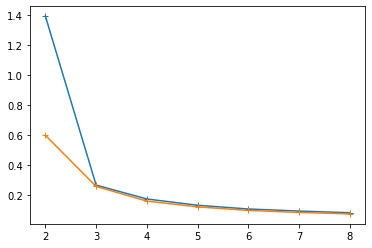

In [15]:
theta_error = theta_estimate[1:8,:,:] - np.kron(np.ones([7,100,1]),np.array(params_true))
error = np.sqrt(np.sum(np.square(np.abs(theta_error)),axis=2))
error_theta3 = np.sqrt(np.sum(np.square(np.abs(theta_error[:,:,0:6])),axis=2))
error_theta2 = np.sqrt(np.sum(np.square(np.abs(theta_error[:,:,6:8])),axis=2))

error_avg = np.sum(np.abs(theta_error),axis=2)/8
error_avg_theta3 = np.sum(np.abs(theta_error[:,:,0:6]),axis=2)/6
error_avg_theta2 = np.sum(np.abs(theta_error[:,:,6:8]),axis=2)/2

error_max = np.max(np.abs(theta_error),axis=2)
error_max_theta3 = np.max(np.abs(theta_error[:,:,0:6]),axis=2)
error_max_theta2 = np.max(np.abs(theta_error[:,:,6:8]),axis=2)

plt.plot(np.arange(7)+2,np.max(error,axis=1),'+-')
plt.plot(np.arange(7)+2,np.max(error_theta3,axis=1),'+-')

# haha = {'Efull': error, 'Etheta3':error_theta3,'Etheta2':error_theta2}
# with open("/content/drive/MyDrive/2020_WINTER/Rust/data_final/figure2_id_xTrand_xErand100_8.txt","wb") as fp:
#   pickle.dump(haha,fp)

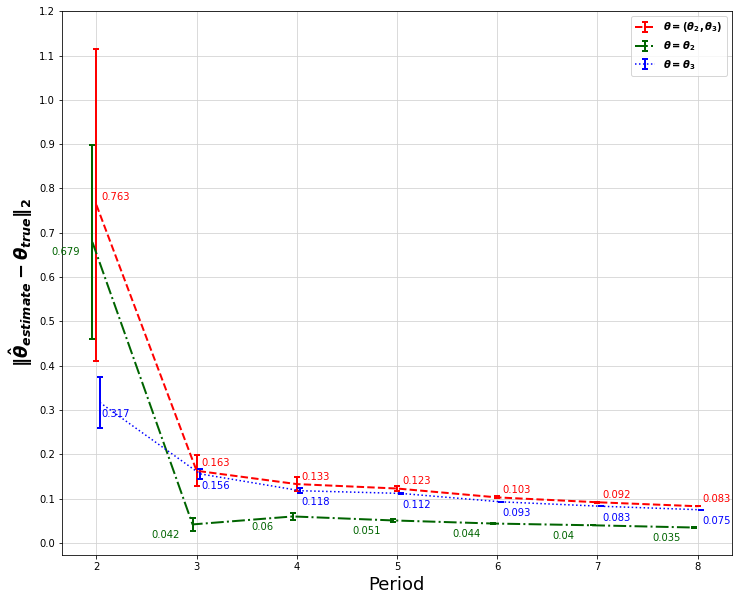

In [16]:
# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#%matplotlib notebook

# First dataset 
City_A=np.around(np.mean(error,axis=1),3)#[36,37,36,34,39,33,30,30,32,31,31,32,32,33,35]

# Second dataset 
City_B=np.around(np.mean(error_theta2,axis=1),3)#[41,35,28,29,25,36,36,32,38,40,40,34,31,28,30]

City_C=np.around(np.mean(error_theta3,axis=1),3)#[41,35,28,29,25,36,36,32,38,40,40,34,31,28,30]

# # Caluclate the mean of datasets
# Mean_City_A=np.mean(City_A)
# Mean_City_B=np.mean(City_B)

# Caluclate the standard deviation of datasets
STDV_City_A=np.std(error,axis=1)#np.std(City_A)
STDV_City_B=np.std(error_avg_theta2,axis=1)#np.std(City_B)
STDV_City_C=np.std(error_avg_theta3,axis=1)#np.std(City_B)

# Create a figure with customized size
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
#ax.set_title('Dynamic Identification Error',fontsize = 25,pad= 30)

# Set the axis lables
ax.set_xlabel('Period', fontsize = 18)
ax.set_ylabel(r'$\Vert \hat{\theta}_{estimate} - \theta_{true}\Vert_2$', fontsize = 18)

# X axis is day numbers from 1 to 15
xaxis = np.arange(7,dtype=int)+2#np.array(range(1,16))

# Line color for error bar
color_City_A = 'red'
color_City_B = 'darkgreen'
color_City_C = 'blue'
# Line style for each dataset
lineStyle_City_A={"linestyle":"--", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":3}
lineStyle_City_B={"linestyle":"dashdot", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":3}
lineStyle_City_C={"linestyle":":", "linewidth":1.5, "markeredgewidth":2, "elinewidth":2, "capsize":3}

# Create an error bar for each dataset
line_City_A=ax.errorbar(xaxis, City_A, yerr=STDV_City_A, **lineStyle_City_A, color=color_City_A, label=r'$\theta =(\theta_2,\theta_3)$')#,fmt ='x')
line_City_B=ax.errorbar(xaxis-0.04, City_B, yerr=STDV_City_B, **lineStyle_City_B, color=color_City_B, label=r'$\theta = \theta_2$')#,fmt ='x')
line_City_C=ax.errorbar(xaxis+0.035, City_C, yerr=STDV_City_C, **lineStyle_City_C, color=color_City_C, label=r'$\theta = \theta_3$')#,fmt ='x')

# Label each dataset on the graph, xytext is the label's position 
for i, txt in enumerate(City_A):
        ax.annotate(txt, xy=(xaxis[i], City_A[i]), xytext=(xaxis[i]+0.05, City_A[i]+0.01),color=color_City_A)

for i, txt in enumerate(City_B):
        ax.annotate(txt, xy=(xaxis[i], City_B[i]), xytext=(xaxis[i]+(-0.45), City_B[i]+(-0.030)),color=color_City_B)
        
for i, txt in enumerate(City_C):
        ax.annotate(txt, xy=(xaxis[i], City_C[i]), xytext=(xaxis[i]+0.05, City_C[i]-0.033),color=color_City_C)
# Draw a legend bar
plt.legend(handles=[line_City_A, line_City_B,line_City_C
                    ], loc='upper right')

# Customize the tickes on the graph
plt.xticks(xaxis)  
plt.yticks(np.linspace(0,1.2,num=13))             
#plt.yticks(np.arange(20, 47, 2))

# Customize the legend font and handle length
params = {'legend.fontsize': 13,
          'legend.handlelength': 2}
plt.rcParams.update(params)

# Customize the font
font = {'family' : 'Arial',
        'weight':'bold',
        'size'   : 12}
matplotlib.rc('font', **font)

# Draw a grid for the graph
ax.grid(color='lightgrey', linestyle='-')
ax.set_facecolor('w')
plt.show()

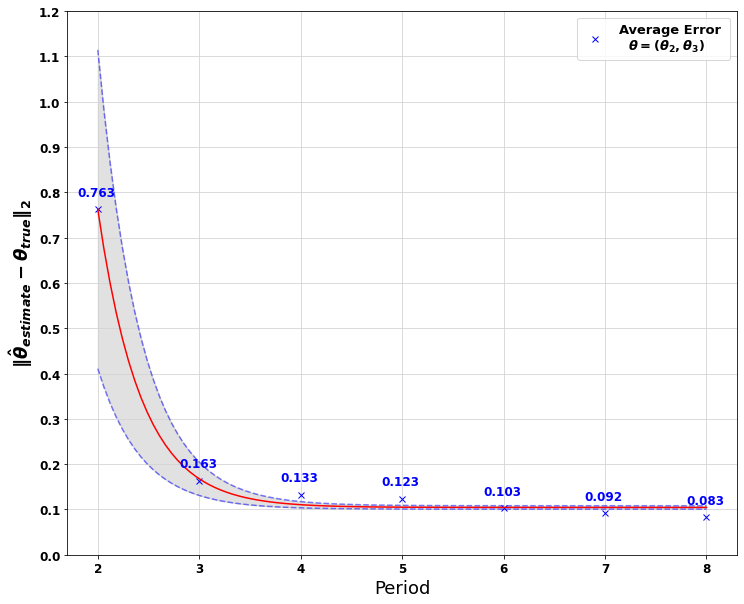

In [21]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.arange(7,dtype=int)+2#np.array(range(1,16))
ydata = np.around(np.mean(error,axis=1),3) #model(xdata)

ydata_std = np.around(np.std(error,axis=1),3)
ystd_add = ydata + ydata_std #model(xdata)
ystd_minus = ydata - ydata_std


#plt.errorbar(xdata, ydata, yerr=ydata_std, **lineStyle_City_A, color='black', label='Totol Error')
#plt.plot(xdata, ydata, 'b-', label='data')

popt, _ = curve_fit(func, xdata, ydata)
popt_add,_ = curve_fit(func, xdata, ystd_add)
popt_minus,_ = curve_fit(func, xdata, ystd_minus)



fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
#ax.set_title('Dynamic Identification Total Error',fontsize = 25,pad= 30)

# Set the axis lables
ax.set_xlabel('Period', fontsize = 18)
ax.set_ylabel(r'$\Vert \hat{\theta}_{estimate} - \theta_{true}\Vert_2$', fontsize = 18)

# Label each dataset on the graph, xytext is the label's position 
for i, txt in enumerate(City_A):
        ax.annotate(txt, xy=(xdata[i], ydata[i]), xytext=(xdata[i]-0.2, ydata[i]+0.03),color='b')
label1 = ax.plot(xdata,ydata,'x',color = 'b',label= 'Average Error \n '+r' $\theta = (\theta_2,\theta_3)$')

x_fit = np.linspace(2,8,100)
label2 = ax.plot(x_fit, func(x_fit, *popt), 'r-')#,
         #label='Fitted Curve: \n a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


ax.fill_between(x_fit, func(x_fit, *popt_minus), func(x_fit, *popt_add), interpolate=True,
                 color='dimgrey', alpha=0.2)
ax.plot(x_fit,func(x_fit, *popt_minus),'b--', alpha=0.5)
ax.plot(x_fit,func(x_fit, *popt_add),'b--', alpha=0.5)


plt.legend(loc='upper right')

# Customize the tickes on the graph
plt.xticks(xdata)  
plt.yticks(np.linspace(0,1.2,num=13))             

# Customize the legend font and handle length
params = {'legend.fontsize': 13,
          'legend.handlelength': 2}
plt.rcParams.update(params)

# Customize the font
font = {'family' : 'Arial',
        'weight':'bold',
        'size'   : 12}
matplotlib.rc('font', **font)

# Draw a grid for the graph
ax.grid(color='lightgrey', linestyle='-')
ax.set_facecolor('w')
plt.show()




In [ ]:
import scipy.stats
ydata_std = scipy.stats.sem(error,axis=1)
print(ydata_std,np.std(error,axis = 1))

[3.54229629e-02 3.49060008e-03 1.58157796e-03 5.27404659e-04
 2.35003178e-04 9.59737876e-05 3.98056168e-05] [0.35245403 0.03473103 0.0157365  0.00524761 0.00233825 0.00095493
 0.00039606]


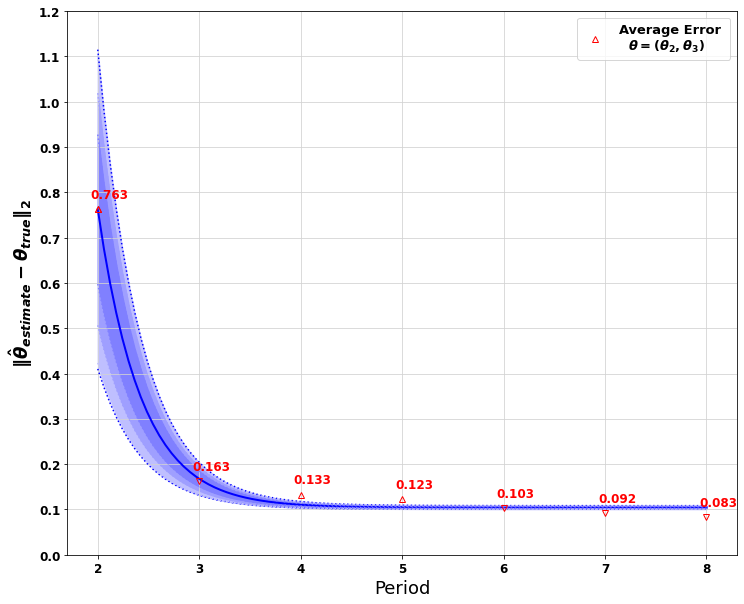

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.arange(7,dtype=int)+2#np.array(range(1,16))
ydata = np.around(np.mean(error,axis=1),3) #model(xdata)


#plt.errorbar(xdata, ydata, yerr=ydata_std, **lineStyle_City_A, color='black', label='Totol Error')
#plt.plot(xdata, ydata, 'b-', label='data')
popt, _ = curve_fit(func, xdata, ydata)

N = 4

ydata_std = scipy.stats.sem(error,axis=1)
#ydata_std = np.std(error,axis=1)/np.sqrt(100)
popt_add = np.zeros([N,3])
popt_minus = np.zeros([N,3])
confi_interval = np.array([0.99999,0.9999999999,0.999999999999999])

for i in range(N):
  if i<N-1:
    ystd_add = ydata + scipy.stats.t.ppf((1 + confi_interval[i]) / 2., 99)*ydata_std
    ystd_minus = ydata - scipy.stats.t.ppf((1 + confi_interval[i]) / 2., 99)*ydata_std  
    popt_add[i,:],_ = curve_fit(func, xdata, ystd_add)
    popt_minus[i,:],_ = curve_fit(func, xdata, ystd_minus,maxfev=10000)
  else:
    ystd_add = ydata + np.std(error,axis=1)
    ystd_minus = ydata - np.std(error,axis=1) 
    popt_add[i,:],_ = curve_fit(func, xdata, ystd_add)
    popt_minus[i,:],_ = curve_fit(func, xdata, ystd_minus,maxfev=10000)    


color = np.array([0,0,1])
colorshade=	1 + np.reshape(np.arange(N)+1,[N,1]).dot(np.reshape(color-1,[1,3]))/N/2


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
#ax.set_title('Dynamic Identification Total Error',fontsize = 25,pad= 30)

# Set the axis lables
ax.set_xlabel('Period', fontsize = 18)
ax.set_ylabel(r'$\Vert \hat{\theta}_{estimate} - \theta_{true}\Vert_2$', fontsize = 18)

x_fit = np.linspace(2,8,100)
label2 = ax.plot(x_fit, func(x_fit, *popt), 'b-', linewidth=2)#,
         #label='Fitted Curve: \n a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))




for i in range(N):
  ax.fill_between(x_fit, func(x_fit, *popt_minus[N-1-i,:]), func(x_fit, *popt_add[N-1-i,:]), interpolate=True,
                 color=colorshade[i,:], alpha=1)
  if i==0:  
    ax.plot(x_fit,func(x_fit, *popt_minus[N-1-i,:]),':',color='blue', alpha=1)
    ax.plot(x_fit,func(x_fit, *popt_add[N-1-i,:]),':',color='blue', alpha=1)
  else:
    ax.plot(x_fit,func(x_fit, *popt_minus[N-1-i,:]),':',color=colorshade[i,:], alpha=1)
    ax.plot(x_fit,func(x_fit, *popt_add[N-1-i,:]),':',color=colorshade[i,:], alpha=1)    

# Label each dataset on the graph, xytext is the label's position 
for i, txt in enumerate(City_A):
        ax.annotate(txt, xy=(xdata[i], ydata[i]), xytext=(xdata[i]-0.07, ydata[i]+0.025),color='r')
        if func(xdata[i],*popt) <ydata[i]:
          ax.plot(xdata[i],ydata[i],'^',color='r',mfc='none')#,label= 'Average Error \n '+r' $\theta = (\theta_2,\theta_3)$')
        else:
          ax.plot(xdata[i],ydata[i],'v',color='r',mfc='none')#,label= 'Average Error \n '+r' $\theta = (\theta_2,\theta_3)$')

ax.plot(xdata[0],ydata[0],'^',color='r',mfc='none',label= 'Average Error \n '+r' $\theta = (\theta_2,\theta_3)$')

plt.legend(loc='upper right')

# Customize the tickes on the graph
plt.xticks(xdata)  
plt.yticks(np.linspace(0,1.2,num=13))             

# Customize the legend font and handle length
params = {'legend.fontsize': 13,
          'legend.handlelength': 2}
plt.rcParams.update(params)

# Customize the font
font = {'family' : 'Arial',
        'weight':'bold',
        'size'   : 12}
matplotlib.rc('font', **font)

# Draw a grid for the graph
ax.grid(color='lightgrey', linestyle='-')
ax.set_facecolor('w')
plt.show()






In [ ]:
# import pickle
# res = {'theta_estimate':theta_estimate,'theta_fun':theta_fun,'theta_success':theta_success,'recover':recover}

# #with open('/content/drive/MyDrive/2020_WINTER/Rust/id_xT1_xE51_7.txt',"wb") as fp:
# #with open('/content/drive/MyDrive/2020_WINTER/Rust/id_xTrand_xE51_7.txt',"wb") as fp:
# with open('/content/drive/MyDrive/2020_WINTER/Rust/id_xTrand_xErand100_8.txt',"wb") as fp:

#     pickle.dump(res,fp)


In [ ]:
import numpy as np
from scipy.special import logsumexp
from tqdm import tqdm
dim_z = int(175)
dim_x = 51

theta2 = [0.949,0.012]
p0 = [0.039,0.333,0.590]
p1=[0.181,0.757,0.061]
params_true = p0 + p1 +theta2
# dynamic = Dynamic(params_true)
theta1_true = [9.243,0.226,1.164]    



z_old = np.kron(np.ones(dim_x,dtype = int),np.arange(dim_z,dtype = int)) 
x_old = np.kron(np.linspace(0,1,num = dim_x),np.ones(dim_z))


def Dynamic(params):
    # theta2 = np.around(params[6:8],3)
    # p0 = np.around(params[0:3],3)
    # p1 = np.around(params[3:6],3)
    theta2 = params[6:8]
    p0 = params[0:3]
    p1 = params[3:6]
    
    # ztranc: [2,175*2,175*2] [s , z * action, z' *s']
    # stranc: [2,175*2,175*2] [s , z * action, z'*s']

    ztranc = np.zeros([2,dim_z*2,dim_z*2])
    stranc = np.zeros([2,dim_z*2,dim_z*2])

    ztranc[0,0:dim_z,:] = np.kron(np.ones(2),p0[0]*np.eye(dim_z,k=0) + p0[1] *np.eye(dim_z,k=1) + p0[2]*np.eye(dim_z,k=2) + (1-np.sum(p0)) *np.eye(dim_z,k=3))
    ztranc[1,0:dim_z,:] = np.kron(np.ones(2),p1[0]*np.eye(dim_z,k=0) + p1[1] *np.eye(dim_z,k=1) + p1[2]*np.eye(dim_z,k=2) + (1-np.sum(p1)) *np.eye(dim_z,k=3))

    ztranc[:,dim_z-1,dim_z-1] = np.ones(2)
    ztranc[:,dim_z-2,dim_z-1] = 1-ztranc[:,dim_z-2,dim_z-2]
    ztranc[:,dim_z-3,dim_z-1] = 1-np.sum(ztranc[:,dim_z-3,:dim_z-1],axis=1)


    ztranc[:,dim_z:2*dim_z,0] = np.ones([2,dim_z])

    stranc[0,0:dim_z,:] = np.hstack([theta2[0] *np.ones([dim_z,dim_z]),(1-theta2[0]) *np.ones([dim_z,dim_z])])
    stranc[1,0:dim_z,:] = np.hstack([theta2[1] *np.ones([dim_z,dim_z]),(1-theta2[1]) *np.ones([dim_z,dim_z])])
    stranc[:,dim_z:2*dim_z,0] = np.ones([2,dim_z])
    return stranc*ztranc#

def SigmaBelief(params,x0,action,state,time=None):
    dynamic = Dynamic(params)

    if time ==None:
        x_tol = np.zeros([x0.shape[0],dim_z])
        sigma_tol = np.zeros([x0.shape[0],dim_z])

        z = state
        #z_prime = np.arange(dim_z) 

        a = action

        #print(x0*dynamic[0,z+a*dim_z,0:dim_z ])
      
        x_tol = (x0 * dynamic[0,z+a*dim_z, 0:dim_z ].T + (1-x0) * dynamic[1,z+a*dim_z,0:dim_z].T).T
        sigma_tol = x_tol + (x0  * dynamic[0,z+ a*dim_z, dim_z:2*dim_z].T + (1-x0 ) * dynamic[1,z+ a*dim_z, dim_z:2*dim_z].T).T
        
        x_tol[np.where(sigma_tol!=0)] = x_tol[np.where(sigma_tol!=0)]/sigma_tol[np.where(sigma_tol!=0)] 

        coef_floor = (np.floor(x_tol*(dim_x-1))/(dim_x-1))-(np.ceil(x_tol*(dim_x-1))/(dim_x-1))
        coef_floor[np.where(coef_floor!=0)] = (coef_floor -np.ceil(coef_floor*(dim_x-1))/(dim_x-1))[np.where(coef_floor!=0)]/ coef_floor[np.where(coef_floor!=0)]
        x_tol = [x_tol,coef_floor]


    elif time ==1:
        x_tol = x0
        sigma_tol = np.zeros(action.shape)

        z = state[0,:]
        z_prime = state[1,:]
        a = action
        
        x_temp = x_tol  * dynamic[0,z+ a*dim_z, z_prime +0] + (1-x_tol ) * dynamic[1,z+ a*dim_z, z_prime +0]
        sigma_tol = x_temp + x_tol  * dynamic[0,z+ a*dim_z, z_prime +dim_z] + (1-x_tol ) * dynamic[1,z+ a*dim_z, z_prime +dim_z]
        x_tol  = x_temp/sigma_tol
            #print(x_temp,sigma_tol,x_tol[i,:],z,a,z_prime)

        coef_floor = (np.floor(x_tol*(dim_x-1))/(dim_x-1))-(np.ceil(x_tol*(dim_x-1))/(dim_x-1))
        coef_floor[np.where(coef_floor!=0)] = (coef_floor -np.ceil(coef_floor*(dim_x-1))/(dim_x-1))[np.where(coef_floor!=0)]/ coef_floor[np.where(coef_floor!=0)]
        x_tol = [x_tol,coef_floor] 
    else:

        # print(time)
        x_tol = np.zeros(state.shape)
        x_tol[0,:] = x0
        sigma_tol = np.zeros([time-1,action.shape[1]])   
        for i in range(1,time):
          z = state[i-1,:]
          z_prime = state[i,:]
          a = action[i-1,:]
          
          x_temp = x_tol[i-1,:]  * dynamic[0,z+ a*dim_z, z_prime +0] + (1-x_tol[i-1,:] ) * dynamic[1,z+ a*dim_z, z_prime +0] 
          sigma_tol[i-1,:] = x_temp + x_tol[i-1,:]  * dynamic[0,z+ a*dim_z, z_prime +dim_z] + (1-x_tol[i-1,:] ) * dynamic[1,z+ a*dim_z, z_prime +dim_z]
          x_tol[i,:]  = x_temp/sigma_tol[i-1,:]
          # if(i==1):
          #   print(x_tol[0,9],z[9],z_prime[9],x_temp[9],a[9],dynamic[1,z[9]+ a[9]*dim_z, z_prime[9] +0] )
        coef_floor = (np.floor(x_tol*(dim_x-1))/(dim_x-1))-(np.ceil(x_tol*(dim_x-1))/(dim_x-1))
        coef_floor[np.where(coef_floor!=0)] = (coef_floor -np.ceil(coef_floor*(dim_x-1))/(dim_x-1))[np.where(coef_floor!=0)]/ coef_floor[np.where(coef_floor!=0)]
        x_tol = [x_tol,coef_floor] 
        #print(x_tol[0].shape,coef_floor.shape)   


    return sigma_tol,x_tol

#print(x_old)

#(a0_sigma,a0_xnew),(a1_sigma,a1_xnew) = SigmaBelief(params_true,x_old,0,z_old,None),SigmaBelief(params_true,x_old,1,z_old,None)

def Reward(theta1):
    reward = np.zeros([dim_x*dim_z,2]) 

    Rc = theta1[0]
    r0 = theta1[1]
    r1 = theta1[2]
    z_old = np.kron(np.ones(dim_x,dtype = int),np.arange(dim_z,dtype = int)) 
    x_old = np.kron(np.linspace(0,1,num = dim_x),np.ones(dim_z))

    reward[:,0] = - 0.001*r0*z_old*x_old - 0.001 *r1 *z_old*(1-x_old)
    reward[:,1] = -Rc

    return reward 

#print(Reward(theta1_true))
#(a0_sigma,a0_xnew),(a1_sigma,a1_xnew) = SigmaBelief(params_true,x_old,0,z_old,None),SigmaBelief(params_true,x_old,1,z_old,None)

def Qfunc(theta1,a0_sigma,a0_xnew,a1_sigma,a1_xnew,Q_old = np.zeros([dim_z*dim_x,2]),beta = 0.9999,gamma = 0.5772,max_item = 1000,thread = 0.25*1e-3):
    #print(x_old)
    r = Reward(theta1)
    Q_new = r.copy()

    for i in range(max_item):
        Q_prime = np.vstack([a0_xnew[1] * Q_old[np.intc(np.floor(a0_xnew[0]*(dim_x-1))) * dim_z +np.arange(dim_z),0]+\
                            (1-a0_xnew[1]) * Q_old[np.intc(np.ceil(a0_xnew[0]*(dim_x-1))) * dim_z +np.arange(dim_z),0],
                            a1_xnew[1] * Q_old[np.intc(np.floor(a1_xnew[0]*(dim_x-1))) * dim_z +np.arange(dim_z),1]+\
                            (1-a1_xnew[1]) * Q_old[np.intc(np.ceil(a1_xnew[0]*(dim_x-1))) * dim_z +np.arange(dim_z),1]])
        Q_prime = gamma + logsumexp( np.reshape(Q_prime,[2,dim_x*dim_z,dim_z]),axis=0 )
        Q_new[:,0] =  r[:,0] + beta * np.sum(a0_sigma* Q_prime,axis=1)
        Q_new[:,1] =  r[:,1] + beta *(gamma + logsumexp(Q_old[(dim_x-1)*dim_z+0,:]))#r[:,1] + beta * np.sum(a1_sigma* Q_prime,axis=1)

        pi_old = np.exp(Q_old[:,0]-Q_old[:,1])/(np.exp(Q_old[:,0]-Q_old[:,1]) +1)
        pi_new = np.exp(Q_new[:,0]-Q_new[:,1])/(np.exp(Q_new[:,0]-Q_new[:,1]) +1)
        error = np.max(np.abs(pi_old-pi_new))

        #error1 = np.max(np.abs((Q_old[:,0]-Q_old[:,1])-(Q_new[:,0]-Q_new[:,1])))

        Q_old = Q_new.copy()
        # if i>max_item:
        #   break
        # i = i+1
        #print(i,error,error1)
        if error <= thread: #or error1 <=thread*5:
          break


    return Q_new, pi_new

In [ ]:
import pandas as pd
def DataGenerate(BeliefSize,SampleSize, TimePeriod, theta1 = [9.243,0.226,1.164], theta2 = [0.949,0.012],\
                p0 = [0.039,0.333,0.590],p1=[0.181,0.757,0.061],rand_status = False):
    
    condition = np.zeros([TimePeriod,SampleSize],dtype = int) #hidden state: 0,1
    state = np.zeros([TimePeriod,SampleSize],dtype = int ) #mileage: 175:0,...,174
    x = np.ones([TimePeriod,SampleSize])#belief: s = 0 prob # 删除

    if rand_status: # s0 z0 x0
        x[0,:] = np.kron(np.linspace(0, 1,num= BeliefSize),np.ones(int(SampleSize/BeliefSize)))
        #x[:,0] = np.kron(np.random.uniform(size = dim_x0),np.ones(int(SampleSize/dim_x0)))

        state[0,:] = np.random.choice(np.arange(20,dtype= int),size = SampleSize,p=np.ones(20)/20)#uniform(0,20)
        pis =0.9509143407122231#np.random.uniform()
        condition[0,:] = np.random.choice([0,1],size = SampleSize, p = [pis,1-pis])#0000
    else:
        pis = 1
    action = np.zeros([TimePeriod,SampleSize],dtype = int)
    rho = 1
    print("generate Q")
    params = p0 + p1 + theta2 
    (a0_sigma,a0_xnew),(a1_sigma,a1_xnew) = SigmaBelief(params,x_old,0,z_old,None),SigmaBelief(params,x_old,1,z_old,None)
    Q,_ = Qfunc(theta1,a0_sigma,a0_xnew,a1_sigma,a1_xnew) # Q function Q(x,a) --> interpolation 
    #pchoice =self.choice_prob(rho,Q) # z = 0, x= 0, 0.1, 0.2,....,1, z = 1, x = 0,...,1 pi
    print("generate dataset")

    #t=0
    coef_floor = (np.floor(x[0,:]*(dim_x-1))/(dim_x-1))-(np.ceil(x[0,:]*(dim_x-1))/(dim_x-1))
    coef_floor[np.where(coef_floor!=0)] = (coef_floor -np.ceil(coef_floor*(dim_x-1))/(dim_x-1))[np.where(coef_floor!=0)]/ coef_floor[np.where(coef_floor!=0)]

    Q_prime = np.vstack([coef_floor* Q[np.intc(np.floor(x[0,:]*(dim_x-1))) * dim_z +state[0,:],0]+\
                        (1-coef_floor) * Q[np.intc(np.ceil(x[0,:]*(dim_x-1))) * dim_z +state[0,:],0],
                        coef_floor * Q[np.intc(np.floor(x[0,:]*(dim_x-1))) * dim_z +state[0,:],1]+\
                        (1-coef_floor) * Q[np.intc(np.ceil(x[0,:]*(dim_x-1))) * dim_z +state[0,:],1]]).T.copy()
    
    pi0 = np.exp(Q_prime[:,0]-Q_prime[:,1])/(np.exp(Q_prime[:,0]-Q_prime[:,1])+1).copy()
    action[0,:] = np.intc(np.random.uniform(0,1,size = SampleSize) > pi0).copy()

    for t in tqdm(range(1,TimePeriod)):

        state[t,np.where(action[t-1,:]==1)] = 0
        condition[t,np.where(action[t-1,:]==1)] = 0 

        delta_z0 = np.random.choice([0,1,2,3],p=[p0[0],p0[1],p0[2],1-np.sum(p0)],size=SampleSize).copy()
        delta_s0 = np.random.choice([0,1],p=[theta2[0],1-theta2[0]],size=SampleSize).copy()
        state[t,np.where((action[t-1,:]==0)*(condition[t-1,:] == 0)==1)] = state[t-1,np.where((action[t-1,:]==0)*(condition[t-1,:] == 0)==1)] + delta_z0[np.where((action[t-1,:]==0)*(condition[t-1,:] == 0)==1)]
        condition[t,np.where((action[t-1,:]==0)*(condition[t-1,:] == 0)==1)] = delta_s0[np.where((action[t-1,:]==0)*(condition[t-1,:] == 0)==1)]

        delta_z1 = np.random.choice([0,1,2,3],p=[p1[0],p1[1],p1[2],1-np.sum(p1)],size=SampleSize).copy()
        delta_s1 = np.random.choice([0,1],p=[theta2[1],1-theta2[1]],size=SampleSize).copy()
        state[t,np.where((action[t-1,:]==0)*(condition[t-1,:] == 1)==1)] = state[t-1,np.where((action[t-1,:]==0)*(condition[t-1,:] == 1)==1)] + delta_z1[np.where((action[t-1,:]==0)*(condition[t-1,:] == 1)==1)]
        condition[t,np.where((action[t-1,:]==0)*(condition[t-1,:] == 1)==1)] = delta_s1[np.where((action[t-1,:]==0)*(condition[t-1,:] == 1)==1)]

        state[t,np.where(state[t,:]>=(dim_z-1))] = 174


        _,temp = SigmaBelief(params,x[t-1,:],action[t-1,:],state[t-1:t+1,:],time=1)
        x[t,:] = temp[0].copy()
        
        coef_floor = temp[1]
        #print(x[t,:]*(dim_x-1),np.floor(x[t,:]*(dim_x-1)), dim_z,state[t,:])

        Q_prime = np.vstack([coef_floor* Q[np.intc(np.floor(x[t,:]*(dim_x-1))) * dim_z +state[t,:],0]+\
                            (1-coef_floor) * Q[np.intc(np.ceil(x[t,:]*(dim_x-1))) * dim_z +state[t,:],0],
                            coef_floor * Q[np.intc(np.floor(x[t,:]*(dim_x-1))) * dim_z +state[t,:],1]+\
                            (1-coef_floor) * Q[np.intc(np.ceil(x[t,:]*(dim_x-1))) * dim_z +state[t,:],1]]).T
    
        pi0 = np.exp(Q_prime[:,0]-Q_prime[:,1])/(np.exp(Q_prime[:,0]-Q_prime[:,1])+1)
        action[t,:] = np.intc(np.random.uniform(0,1,size = SampleSize) > pi0).copy()

            


    state_new = np.reshape(state.T,[-1])
    action_new = np.reshape(action.T,[-1])
    data = {'state':state_new,'action':action_new}
    dat_new = pd.DataFrame(data=data)
    
    return dat_new,{'state':state,'action':action.T,'hidden':condition.T,'belief':x.T,'pis':pis}



In [ ]:
res = DataGenerate(100,3000, 100, theta1 = [9.243,0.226,1.164], theta2 = [0.949,0.012],\
                p0 = [0.039,0.333,0.590],p1=[0.181,0.757,0.061],rand_status = True)

generate Q


 20%|██        | 20/99 [00:00<00:00, 191.16it/s]

generate dataset


100%|██████████| 99/99 [00:00<00:00, 179.30it/s]


In [ ]:
import pickle

with open('/content/drive/MyDrive/2020_WINTER/Rust/data/sample_final.txt','rb') as fp:
  res = pickle.load(fp)
print(res)

{'res': (        state  action
0          14       0
1          16       0
2          18       0
3          20       0
4          22       0
...       ...     ...
299995     40       0
299996     41       0
299997     42       0
299998     43       0
299999     44       0

[300000 rows x 2 columns], {'state': array([[ 14,   4,  19, ...,  15,   3,   9],
       [ 16,   5,  21, ...,  16,   5,  11],
       [ 18,   7,  23, ...,  17,   6,  13],
       ...,
       [ 11,   6,  59, ...,  13,  99,  42],
       [ 12,   8,  60, ...,  14,  99,  43],
       [ 13,  10,  61, ...,  15, 100,  44]]), 'action': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'hidden': array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0,

In [ ]:
from scipy.special import logsumexp
from scipy.optimize import minimize #scipy version = 1.4.1
import warnings
warnings.filterwarnings("ignore")
SampleSize = 3000
TimePeriod = 100

data = np.array(res['res'][0])
x0 = res['res'][1]['belief'][:,0]

# data = np.array(res[0])
# x0 = res[1]['belief'][:,0]

state = data[:,0].reshape([SampleSize,TimePeriod]).T
action = data[:,1].reshape([SampleSize,TimePeriod]).T


def loglike1_func(params,x0=x0,action=action,state=state,TimePeriod=TimePeriod):
    sigma,_ = SigmaBelief(params,x0,action,state,time=TimePeriod)
    #print(params,sigma[np.where(np.log(sigma)==np.nan)],-np.sum(np.log(sigma)))
    return -np.sum(np.log(sigma))

def loglike1():
        #x0 = [0.03,0.33,0.59,0.18,0.75,0.06, 0.94, 0.01]
        x0 = [0.039,0.333,0.590,0.181,0.757,0.061,0.949,0.012]
        cons= ({'type': 'ineq', 'fun': lambda x: x[0]-0.001 },\
                {'type': 'ineq', 'fun': lambda x: x[1]-0.001 },\
                {'type': 'ineq', 'fun': lambda x: x[2]-0.001 },\
                {'type': 'ineq', 'fun': lambda x: x[3]-0.001 },\
                {'type': 'ineq', 'fun': lambda x: x[4]-0.001},\
                {'type': 'ineq', 'fun': lambda x: x[5]-0.001 },\
                {'type': 'ineq', 'fun': lambda x: x[6]},\
                {'type': 'ineq', 'fun': lambda x: x[7]},\
                {'type': 'ineq', 'fun': lambda x: 0.998-x[0]},\
                {'type': 'ineq', 'fun': lambda x: 0.998-x[1]},\
                {'type': 'ineq', 'fun': lambda x: 0.998-x[2]},\
                {'type': 'ineq', 'fun': lambda x: 0.998-x[3]},\
                {'type': 'ineq', 'fun': lambda x: 0.998-x[4]},\
                {'type': 'ineq', 'fun': lambda x: 0.998-x[5]},\
                {'type': 'ineq', 'fun': lambda x: 0.99999-x[6]},\
                {'type': 'ineq', 'fun': lambda x: 0.99999-x[7]},\
                {'type': 'ineq', 'fun': lambda x: 1-x[0]-x[1]-x[2]-0.001 },\
                {'type': 'ineq', 'fun': lambda x: 1-x[3]-x[4]-x[5]-0.001 },\
                {'type': 'ineq', 'fun': lambda x: -3*x[0]-2*x[1]-x[2]+3*x[3]+2*x[4]+x[5] })

        fitted1 = minimize(
            loglike1_func,
            x0=x0,#bounds = bounds,
            constraints= cons)
        return fitted1
# fitted1 = loglike1()
# print(fitted1)
print(loglike1_func(res['data'][0],x0=x0,action=action,state=state,TimePeriod=TimePeriod))


252338.53280359664


In [ ]:
(a0_sigma,a0_xnew),(a1_sigma,a1_xnew) = SigmaBelief(res['data'][0],x_old,0,z_old,None),SigmaBelief(res['data'][0],x_old,1,z_old,None)
_,belief = SigmaBelief(res['data'][0],x0,action,state,time=TimePeriod)

# (a0_sigma,a0_xnew),(a1_sigma,a1_xnew) = SigmaBelief(fitted1.x,x_old,0,z_old,None),SigmaBelief(fitted1.x,x_old,1,z_old,None)
# _,belief = SigmaBelief(fitted1.x,x0,action,state,time=TimePeriod)
def loglike2_func(theta1,belief = belief,action=action,state=state,TimePeriod=TimePeriod,a0_sigma=a0_sigma,a0_xnew=a0_xnew,a1_sigma=a1_sigma,a1_xnew=a1_xnew):
    #print('generate Q')
    Q,_ = Qfunc(theta1,a0_sigma,a0_xnew,a1_sigma,a1_xnew) # Q function Q(x,a) --> interpolation 
    #print('finished')
    x = belief[0]
    Q_pis = np.vstack([belief[1] * Q[np.intc(np.floor(x*(dim_x-1))*dim_z)+state,0] + \
           (1- belief[1]) * Q[np.intc(np.ceil(x*(dim_x-1))*dim_z)+state,0],\
           belief[1] * Q[np.intc(np.floor(x*(dim_x-1))*dim_z)+state,1] + \
           (1- belief[1]) * Q[np.intc(np.ceil(x*(dim_x-1))*dim_z)+state,1]]).reshape([2,TimePeriod,SampleSize])
    Q_pis = Q_pis[0,:,:] -Q_pis[1,:,:]
    pi0 =  np.exp(Q_pis)/(np.exp(Q_pis)+1)
    pi0 = (1-action) * pi0 + action*(1-pi0)
    print(theta1,-np.sum(np.log(pi0)))
    #print(params,sigma[np.where(np.log(sigma)==np.nan)],-np.sum(np.log(sigma)))
    return -np.sum(np.log(pi0))

def loglike2(x0=None, bounds=None,p0 =None,p1=None ):
    if bounds == None:
        bounds = [(1e-6, 100),(1e-6,100),(1e-6,100)]

    if x0 == None:
        x0 = [0.1,0.1,0.1]#[9.243,0.226,1.164]

    cons= ({'type': 'ineq', 'fun': lambda x: x[2]-x[1] },\
            {'type': 'ineq', 'fun': lambda x: x[0]-1e-6 },\
            {'type': 'ineq', 'fun': lambda x: x[1]-1e-6 },\
            {'type': 'ineq', 'fun': lambda x: x[2]-1e-6 },\
            {'type': 'ineq', 'fun': lambda x: 100-x[0]},\
            {'type': 'ineq', 'fun': lambda x: 100-x[1]},\
            {'type': 'ineq', 'fun': lambda x: 100-x[2]})
    fitted2 = minimize(
        loglike2_func, x0=x0,#bounds = bounds, 
        constraints= cons)#, args=(p0, p1, theta2))
    return fitted2
# fitted2 = loglike2()
# print(fitted2)
print(loglike2_func(res['data'][1],belief = belief,action=action,state=state,TimePeriod=TimePeriod,a0_sigma=a0_sigma,a0_xnew=a0_xnew,a1_sigma=a1_sigma,a1_xnew=a1_xnew))

TypeError: ignored

In [ ]:
from scipy.special import logsumexp
from scipy.optimize import minimize #scipy version = 1.4.1
import warnings
warnings.filterwarnings("ignore")
SampleSize = 3000
TimePeriod = 100
data = np.array(res[0])
state = data[:,0].reshape([SampleSize,TimePeriod]).T
action = data[:,1].reshape([SampleSize,TimePeriod]).T
x0 = res[1]['belief'][:,0]
x0_dk =  np.random.uniform(size = x0.shape)

def loglike1_func(params,x0=x0_dk,action=action,state=state,TimePeriod=TimePeriod):
    sigma,_ = SigmaBelief(params,x0,action,state,time=TimePeriod)
    #print(params,sigma[np.where(np.log(sigma)==np.nan)],-np.sum(np.log(sigma)))
    return -np.sum(np.log(sigma))

def loglike1():
        x0 = [0.03,0.33,0.59,0.18,0.75,0.06, 0.94, 0.01]
        #x0 = 0.1*np.ones(8)
        #x0 = [0.039,0.333,0.590,0.181,0.757,0.061,0.949,0.012]
        # cons= ({'type': 'ineq', 'fun': lambda x: x[0]-0.001 },\
        #         {'type': 'ineq', 'fun': lambda x: x[1]-0.001 },\
        #         {'type': 'ineq', 'fun': lambda x: x[2]-0.001 },\
        #         {'type': 'ineq', 'fun': lambda x: x[3]-0.001 },\
        #         {'type': 'ineq', 'fun': lambda x: x[4]-0.001},\
        #         {'type': 'ineq', 'fun': lambda x: x[5]-0.001 },\
        #         {'type': 'ineq', 'fun': lambda x: x[6]},\
        #         {'type': 'ineq', 'fun': lambda x: x[7]},\
        #         {'type': 'ineq', 'fun': lambda x: 0.998-x[0]},\
        #         {'type': 'ineq', 'fun': lambda x: 0.998-x[1]},\
        #         {'type': 'ineq', 'fun': lambda x: 0.998-x[2]},\
        #         {'type': 'ineq', 'fun': lambda x: 0.998-x[3]},\
        #         {'type': 'ineq', 'fun': lambda x: 0.998-x[4]},\
        #         {'type': 'ineq', 'fun': lambda x: 0.998-x[5]},\
        #         {'type': 'ineq', 'fun': lambda x: 0.99999-x[6]},\
        #         {'type': 'ineq', 'fun': lambda x: 0.99999-x[7]},\
        #         {'type': 'ineq', 'fun': lambda x: 1-x[0]-x[1]-x[2]-0.001 },\
        #         {'type': 'ineq', 'fun': lambda x: 1-x[3]-x[4]-x[5]-0.001 },\
        #         {'type': 'ineq', 'fun': lambda x: -3*x[0]-2*x[1]-x[2]+3*x[3]+2*x[4]+x[5] })

        fitted1 = minimize(
            loglike1_func,
            x0=x0,#bounds = bounds,
            method = 'Nelder-Mead')

            #constraints= cons)
        return fitted1
fitted1_dk = loglike1()
print(fitted1_dk)


 final_simplex: (array([[0.03741249, 0.32690735, 0.59682803, 0.18097508, 0.75552138,
        0.06246241, 0.94978613, 0.01266247],
       [0.0374138 , 0.32691179, 0.59682374, 0.18096906, 0.7555304 ,
        0.06245952, 0.94979096, 0.01266388],
       [0.03741146, 0.32692007, 0.59681659, 0.18097473, 0.75552787,
        0.06245665, 0.9497843 , 0.01266326],
       [0.03741487, 0.32690922, 0.59682203, 0.18096652, 0.75553217,
        0.06246125, 0.94979007, 0.0126636 ],
       [0.03741106, 0.32690595, 0.59683398, 0.18097515, 0.75552939,
        0.06245547, 0.94978619, 0.01266291],
       [0.03741638, 0.32691238, 0.59682025, 0.18097503, 0.75552483,
        0.06245951, 0.94979009, 0.01266325],
       [0.03741472, 0.32691264, 0.59682239, 0.18096806, 0.75553431,
        0.06245715, 0.94977758, 0.01266466],
       [0.03741361, 0.32690633, 0.59683134, 0.18097317, 0.75552946,
        0.06245695, 0.94978544, 0.0126662 ],
       [0.03740754, 0.32691167, 0.59683198, 0.180971  , 0.75552755,
        0.0

In [ ]:
(a0_sigma,a0_xnew),(a1_sigma,a1_xnew) = SigmaBelief(fitted1_dk.x,x_old,0,z_old,None),SigmaBelief(fitted1_dk.x,x_old,1,z_old,None)
_,belief = SigmaBelief(fitted1_dk.x,x0_dk,action,state,time=TimePeriod)
def loglike2_func(theta1,belief = belief,action=action,state=state,TimePeriod=TimePeriod,a0_sigma=a0_sigma,a0_xnew=a0_xnew,a1_sigma=a1_sigma,a1_xnew=a1_xnew):
    #print('generate Q')
    Q,_ = Qfunc(theta1,a0_sigma,a0_xnew,a1_sigma,a1_xnew) # Q function Q(x,a) --> interpolation 
    #print('finished')
    x = belief[0]
    Q_pis = np.vstack([belief[1] * Q[np.intc(np.floor(x*(dim_x-1))*dim_z)+state,0] + \
           (1- belief[1]) * Q[np.intc(np.ceil(x*(dim_x-1))*dim_z)+state,0],\
           belief[1] * Q[np.intc(np.floor(x*(dim_x-1))*dim_z)+state,1] + \
           (1- belief[1]) * Q[np.intc(np.ceil(x*(dim_x-1))*dim_z)+state,1]]).reshape([2,TimePeriod,SampleSize])
    Q_pis = Q_pis[0,:,:] -Q_pis[1,:,:]
    pi0 =  np.exp(Q_pis)/(np.exp(Q_pis)+1)
    pi0 = (1-action) * pi0 + action*(1-pi0)
    print(theta1,-np.sum(np.log(pi0)))
    #print(params,sigma[np.where(np.log(sigma)==np.nan)],-np.sum(np.log(sigma)))
    return -np.sum(np.log(pi0))

def loglike2(x0=None, bounds=None,p0 =None,p1=None ):
    if bounds == None:
        bounds = [(1e-6, 100),(1e-6,100),(1e-6,100)]

    if x0 == None:
        #x0 = [9.243,0.226,1.164]
        x0 = [0.1,0.1,0.1]

    cons= ({'type': 'ineq', 'fun': lambda x: x[2]-x[1] },\
            {'type': 'ineq', 'fun': lambda x: x[0]-1e-6 },\
            {'type': 'ineq', 'fun': lambda x: x[1]-1e-6 },\
            {'type': 'ineq', 'fun': lambda x: x[2]-1e-6 },\
            {'type': 'ineq', 'fun': lambda x: 100-x[0]},\
            {'type': 'ineq', 'fun': lambda x: 100-x[1]},\
            {'type': 'ineq', 'fun': lambda x: 100-x[2]})
    fitted2 = minimize(
        loglike2_func, x0=x0,#bounds = bounds, 
        constraints= cons)#, args=(p0, p1, theta2))
    return fitted2
fitted2_dk = loglike2()
print(fitted2_dk)

[0.1 0.1 0.1] 195096.36567239522
[0.1 0.1 0.1] 195096.36567239522
[0.10000001 0.1        0.1       ] 195096.36357837424
[0.1        0.10000001 0.1       ] 195096.36574266796
[0.1        0.1        0.10000001] 195096.36583706192
[9.90069726e+01 3.33484694e-02 7.81434176e-02] inf
[9.99069726 0.09333485 0.09781434] 19978.902615345913
[9.99069726 0.09333485 0.09781434] 19978.902615345913
[9.99069727 0.09333485 0.09781434] 19978.902644970996
[9.99069726 0.09333486 0.09781434] 19978.902614116716
[9.99069726 0.09333485 0.09781436] 19978.90261100968
[ 18.32646781  15.63826118 100.        ] inf
[10.82427432  1.64782748 10.08803291] 53708.986029062915
[10.07405497  0.24878411  1.0968362 ] 19841.11655398292
[10.07405497  0.24878411  1.0968362 ] 19841.11655398292
[10.07405498  0.24878411  1.0968362 ] 19841.11658360805
[10.07405497  0.24878413  1.0968362 ] 19841.116552753614
[10.07405497  0.24878411  1.09683621] 19841.116549647482
[18.68816401 30.00100536 99.99999999] nan
[10.93546587  3.22400623 1

In [ ]:
# import pickle

# haha = {'res':res,'data':[params_true,theta1_true] ,'data_kn':[fitted1,fitted2],'data_dk':[fitted1_dk,fitted2_dk],'rand_belief': x0_dk}
# with open('/content/drive/MyDrive/2020_WINTER/Rust/data/sample_final.txt','wb') as fp:
#   pickle.dump(haha,fp)